# 1. Paths for the CIR process - two different boundary condition considered 
We simulate the CIR process by 2 different methods : truncated boundary condition and reflecting boundary condition

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def GeneratePathsCIREuler2Schemes(NoOfPaths, NoOfSteps, T, kappa, v0, vbar, gamma):
    Z = np.random.normal(0, 1, [NoOfPaths, NoOfSteps])
    W = np.zeros([NoOfPaths, NoOfSteps + 1])
    V1 = np.zeros([NoOfPaths, NoOfSteps + 1])
    V2 = np.zeros([NoOfPaths, NoOfSteps + 1])
    
    # for truncated boundary condition
    V1[:, 0] = v0
    # for reflecting boundary condition
    V2[:, 0] = v0
    
    time = np.zeros([NoOfSteps + 1])
    
    dt = T / float(NoOfSteps)
    
    for i in range(0, NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:, i] = (Z[:, i] - np.mean(Z[:, i])) / np.std(Z[: ,i])
        
        W[:, i + 1] = W[:, i] + np.power(dt, 0.5) * Z[:, i]
        
        # Truncated boundary condition
        V1[:, i + 1] = V1[:, i] + kappa * (vbar - V1[:, i]) * dt +  gamma * np.sqrt(V1[:, i]) * (W[:, i + 1] - W[:, i])
        V1[:, i + 1] = np.maximum(V1[:, i + 1], 0)
        
        # Reflecting boundary condition
        V2[:, i + 1] = V2[:, i] + kappa * (vbar - V2[:, i]) * dt +  gamma * np.sqrt(V2[:, i]) * (W[:, i + 1] - W[:, i])
        V2[:, i + 1] = np.absolute(V2[:, i + 1])
        
        time[i + 1] = time[i] + dt
        
    # Output
    paths = {"time" : time, "Vtruncated" : V1, "Vreflected" : V2}
        
    return paths

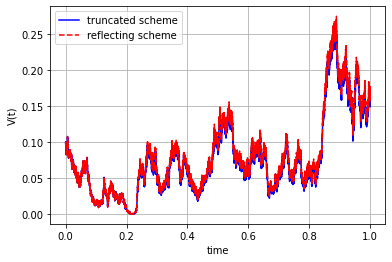

In [16]:
def mainCalculation():
    NoOfPaths = 1
    NoOfSteps = 20000
    T     = 1
    kappa = 0.5
    v0    = 0.1
    vbar  = 0.1
    gamma = 0.8
    np.random.seed(15)
    
    Paths = GeneratePathsCIREuler2Schemes(NoOfPaths,NoOfSteps,T,kappa,v0,vbar,gamma)
    timeGrid = Paths["time"]
    V_truncated = Paths["Vtruncated"]
    V_reflected = Paths["Vreflected"]
    
    plt.figure(1)
    plt.plot(timeGrid, np.transpose(V_truncated),'b')   
    plt.plot(timeGrid, np.transpose(V_reflected),'--r')   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("V(t)")
    plt.legend(['truncated scheme','reflecting scheme'])     
    
mainCalculation()

We try to increase NoOfSteps (delta t converges to 0) to reduce the bias of 2 paths

# 2. Exact Simulation of the CIR Model  
v(t) follows the noncentral chi-squared distribution

In [18]:
def CIR_sample(NoOfPaths, kappa, gamma, vbar, s, t, v_s):
    delta = 4 * kappa * vbar / (gamma ** 2)
    c = gamma ** 2 / (4 *  kappa) * (1 - np.exp(- kappa * (t - s)))
    kappaBar = 4 * kappa * v_s * np.exp(- kappa * (t - s)) / (gamma ** 2 * (1 - np.exp(- kappa * (t - s))))
    
    sample = c * np.random.noncentral_chisquare(delta, kappaBar, NoOfPaths)
    
    return sample

In [19]:
def GeneratePathsCIRExact(NoOfPaths, NoOfSteps, T, kappa, v0, vbar, gamma):
    Z = np.random.normal(0, 1, [NoOfPaths, NoOfSteps])
    W = np.zeros([NoOfPaths, NoOfSteps + 1])
    V = np.zeros([NoOfPaths, NoOfSteps + 1])
    
    V[:, 0] = v0
    
    time = np.zeros([NoOfSteps + 1])
    
    dt = T / float(NoOfSteps)
    
    for i in range(NoOfSteps):
        # making sure that samples from normal have zero mean and variance 1
        if NoOfPaths > 1:
            Z[:, i] = (Z[:, i] - mean(Z[:, i])) / np.std(Z[:, i])
        
        W[:, i + 1] = W[:, i] + np.power(dt, 0.5) *  Z[:, i]
        
        # Exact simulation
        V[:, i + 1] = CIR_sample(NoOfPaths, kappa, gamma, vbar, 0, dt, V[:, i])
        # s = 0, t = dt because t - s is always = dt
        time[i + 1] = time[i] + dt
        
    # Outputs
    paths = {"time" : time, "VExact" : V}
    
    return paths

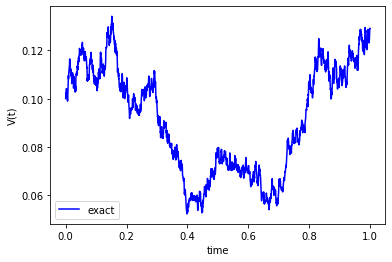

In [21]:
def mainCalculation():
    NoOfPaths = 1
    NoOfSteps = 2000
    T     = 1
    kappa = 0.7
    v0    = 0.1
    vbar  = 0.1
    gamma = 0.2

    np.random.seed(10)
    Paths = GeneratePathsCIRExact(NoOfPaths,NoOfSteps,T,kappa,v0,vbar,gamma)
    timeGrid = Paths["time"]
    V_exact = Paths["VExact"]
    
    plt.figure(1)
    plt.plot(timeGrid, np.transpose(V_exact),'b')   
    plt.xlabel("time")
    plt.ylabel("V(t)")
    plt.legend(['exact'])     
    
mainCalculation()